<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/assisgnment_11_textmining(amazonreview).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#importing lobraries
import re
import nltk
import spacy
import codecs
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Multi-page web-scraping

In [35]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/2022-Apple-MacBook-Laptop-chip/dp/B0B3BMKMGP/ref=sr_1_2_sspa?keywords=macbook&qid=1684656247&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

Looping through multiple pages

In [36]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [37]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [38]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/2022-Apple-MacBook-Laptop-chip/product-reviews/B0B3BMKMGP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-38-fab374d194e1>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(160)):


  0%|          | 0/160 [00:00<?, ?it/s]

Save results to a Dataframe, then export as CSV

In [39]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,Quality,5.0,Yes,Reviewed in India on 28 April 2023
1,Must buy,5.0,"You must have it , just wow,, excellent and 10...",Reviewed in India on 3 March 2023
2,Efficient machine. Gets work done quick 👍🏼,5.0,Its been a while since using a Mac & I'm quite...,Reviewed in India on 20 January 2023
3,Fantastic,5.0,"There is no competitor of macbook, Price is hi...",Reviewed in India on 19 January 2023
4,Excellent laptop for Business people,5.0,"Awesome laptop.Excellent screen, Excellent Bat...",Reviewed in India on 7 February 2023
...,...,...,...,...
1595,Mind-blowing purchase.,5.0,Excellent product.Delivered in the next day of...,Reviewed in India on 7 December 2022
1596,Worth the price,5.0,It's super smooth and fast. Screen is beautifu...,Reviewed in India on 4 January 2023
1597,Charger is not working,1.0,My charger is not working. Its just been a few...,Reviewed in India on 5 April 2023
1598,"Great battery life, awesome display, increased...",5.0,I was not sure about the Apple MacBook air M2 ...,Reviewed in India on 3 December 2022


In [40]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [41]:
df.head(50)

,Title,Rating,Review,Review_Date
0,Quality,5.0,Yes,28 April 2023
1,Must buy,5.0,"You must have it , just wow,, excellent and 10...",3 March 2023
2,Efficient machine. Gets work done quick 👍🏼,5.0,Its been a while since using a Mac & I'm quite...,20 January 2023
3,Fantastic,5.0,"There is no competitor of macbook, Price is hi...",19 January 2023
4,Excellent laptop for Business people,5.0,"Awesome laptop.Excellent screen, Excellent Bat...",7 February 2023
5,Mind-blowing purchase.,5.0,Excellent product.Delivered in the next day of...,7 December 2022
6,Worth the price,5.0,It's super smooth and fast. Screen is beautifu...,4 January 2023
7,Charger is not working,1.0,My charger is not working. Its just been a few...,5 April 2023
8,"Great battery life, awesome display, increased...",5.0,I was not sure about the Apple MacBook air M2 ...,3 December 2022
9,🍎👨‍💻,4.0,"About the product:I have the Starlight, 16GB R...",22 August 2022


In [42]:
df.to_csv("macbook_Review.csv")

In [43]:
#load dataset
reviews = pd.read_csv('macbook_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,Quality,5.0,Yes,28 April 2023
1,Must buy,5.0,"You must have it , just wow,, excellent and 10...",3 March 2023
2,Efficient machine. Gets work done quick 👍🏼,5.0,Its been a while since using a Mac & I'm quite...,20 January 2023
3,Fantastic,5.0,"There is no competitor of macbook, Price is hi...",19 January 2023
4,Excellent laptop for Business people,5.0,"Awesome laptop.Excellent screen, Excellent Bat...",7 February 2023
...,...,...,...,...
1595,Mind-blowing purchase.,5.0,Excellent product.Delivered in the next day of...,7 December 2022
1596,Worth the price,5.0,It's super smooth and fast. Screen is beautifu...,4 January 2023
1597,Charger is not working,1.0,My charger is not working. Its just been a few...,5 April 2023
1598,"Great battery life, awesome display, increased...",5.0,I was not sure about the Apple MacBook air M2 ...,3 December 2022


In [44]:
reviews.Rating.describe()

count    1600.000000
mean        4.500000
std         1.204536
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [45]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1600 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [46]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [47]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,Quality,5.0,Yes,28 April 2023
1,Must buy,5.0,"You must have it , just wow,, excellent and 10...",3 March 2023
2,Efficient machine. Gets work done quick 👍🏼,5.0,Its been a while since using a Mac & I'm quite...,20 January 2023
3,Fantastic,5.0,"There is no competitor of macbook, Price is hi...",19 January 2023
4,Excellent laptop for Business people,5.0,"Awesome laptop.Excellent screen, Excellent Bat...",7 February 2023


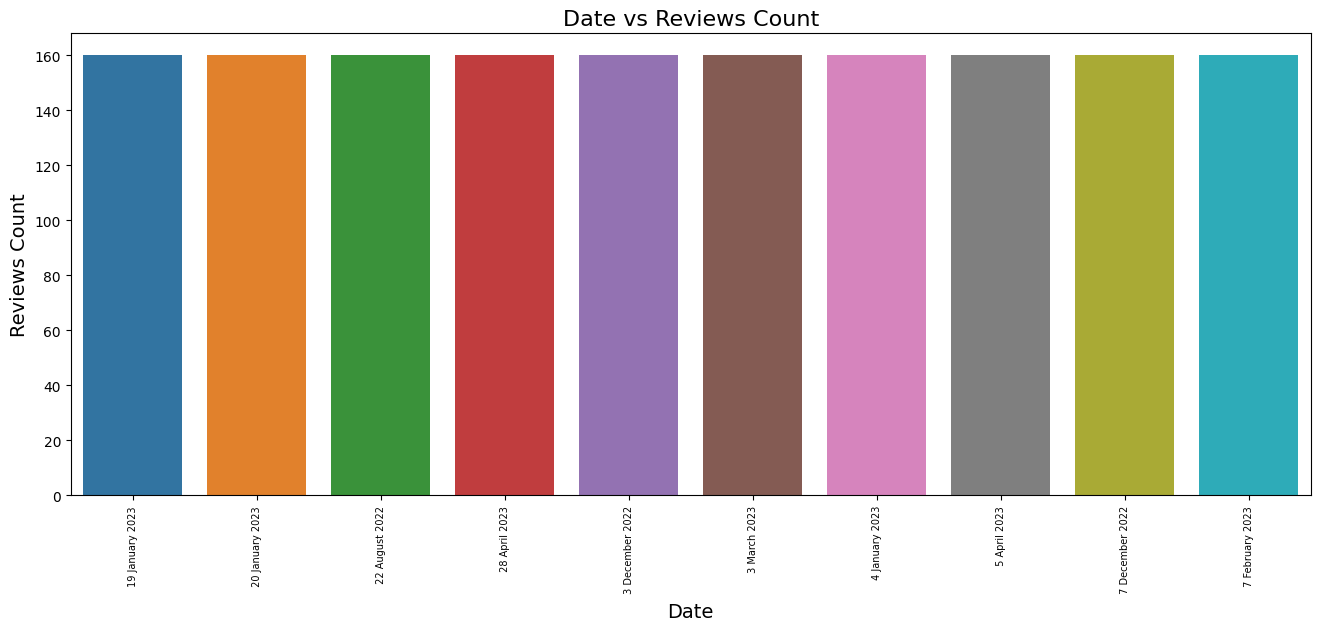

In [48]:
#Data visualization
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

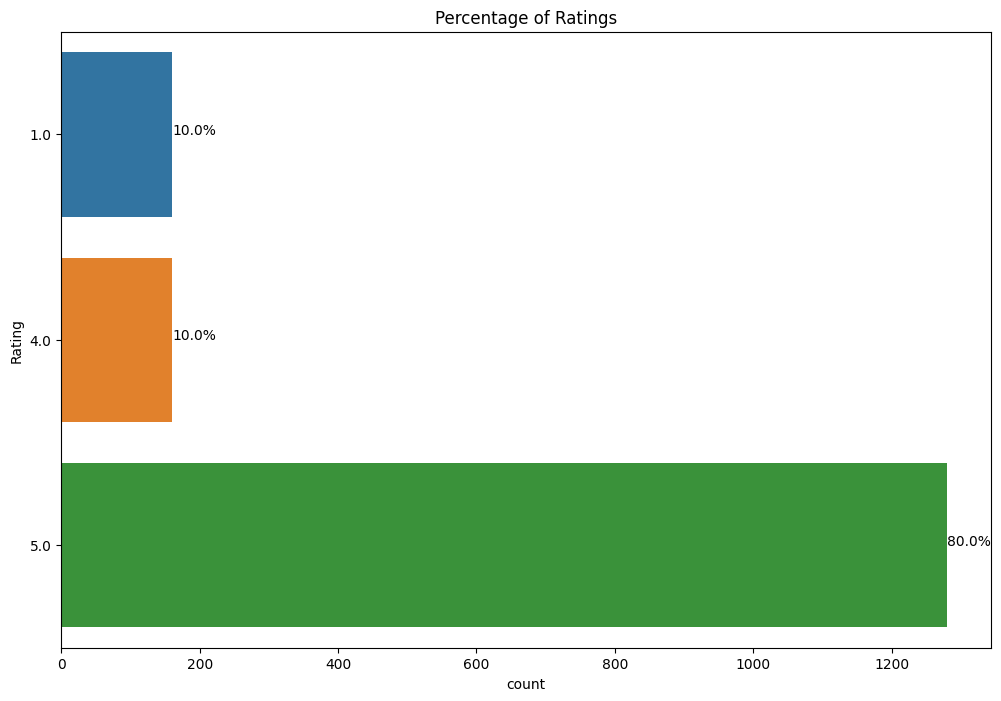

In [49]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [50]:
#BasicText Preprocessing for Sentiment Analysis
#Spelling Correction
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                                  Yes
1    You must have it , just now,, excellent and 10...
2    Its been a while since using a Sac & I'm quite...
3    There is no competitor of malbrook, Price is h...
4    Awesome lawton.Excellent screen, Excellent Bat...
Name: Review, dtype: object

In [51]:
macbook_review = reviews[['Review']]
macbook_review

,Review
0,Yes
1,"You must have it , just wow,, excellent and 10..."
2,Its been a while since using a Mac & I'm quite...
3,"There is no competitor of macbook, Price is hi..."
4,"Awesome laptop.Excellent screen, Excellent Bat..."
...,...
1595,Excellent product.Delivered in the next day of...
1596,It's super smooth and fast. Screen is beautifu...
1597,My charger is not working. Its just been a few...
1598,I was not sure about the Apple MacBook air M2 ...


Resetting index

In [52]:
macbook_review.reset_index(drop=True, inplace=True)

In [53]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
macbook_review['Review'] = macbook_review['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-53-760a1374059e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macbook_review['Review'] = macbook_review['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


Lemmatizer

In [71]:
 nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len( macbook_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", macbook_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-71-efafe784aa58>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len( macbook_review))):


  0%|          | 0/1600 [00:00<?, ?it/s]

In [55]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": macbook_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,yes,Yes
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat..."


Text Pre-processing Techniques

In [56]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [57]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,yes,Yes
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat..."
5,excellent product delivered next day purchase ...,Excellent product.Delivered next day purchase....
6,super smooth fast screen beautiful really good...,It's super smooth fast. Screen beautiful. It r...
7,charger working month,My charger working. Its months
8,sure apple macbook air bought writing review d...,I sure Apple MacBook air M2 I bought it. Writi...
9,product starlight gb ram variant work fine rec...,"About product:I Starlight, 16GB RAM variant, w..."


In [58]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,yes,Yes
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat..."
5,excellent product delivered next day purchase ...,Excellent product.Delivered next day purchase....
6,super smooth fast screen beautiful really good...,It's super smooth fast. Screen beautiful. It r...
7,charger working month,My charger working. Its months
8,sure apple macbook air bought writing review d...,I sure Apple MacBook air M2 I bought it. Writi...
9,product starlight gb ram variant work fine rec...,"About product:I Starlight, 16GB RAM variant, w..."


In [59]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,yes,Yes
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat..."
5,excellent product delivered next day purchase ...,Excellent product.Delivered next day purchase....
6,super smooth fast screen beautiful really good...,It's super smooth fast. Screen beautiful. It r...
7,charger working month,My charger working. Its months
8,sure apple macbook air bought writing review d...,I sure Apple MacBook air M2 I bought it. Writi...
9,product starlight gb ram variant work fine rec...,"About product:I Starlight, 16GB RAM variant, w..."


In [60]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [61]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,yes,Yes
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat..."
5,excellent product delivered next day purchase ...,Excellent product.Delivered next day purchase....
6,super smooth fast screen beautiful really good...,It's super smooth fast. Screen beautiful. It r...
7,charger working month,My charger working. Its months
8,sure apple macbook air bought writing review d...,I sure Apple MacBook air M2 I bought it. Writi...
9,product starlight gb ram variant work fine rec...,"About product:I Starlight, 16GB RAM variant, w..."


In [63]:
#Removing stopword
from nltk.corpus import stopwords
stop_ = stopwords.words("english")
stop_

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
#Tokenize clean review
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['must', 'wow', 'excellent', 'product'])

In [73]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                                                [yes]
1                      [must, wow, excellent, product]
2    [since, using, mac, quite, amazed, machine, wo...
3    [competitor, macbook, price, high, doubt, neve...
4    [awesome, laptop, excellent, screen, excellent...
5    [excellent, product, delivered, next, day, pur...
6    [super, smooth, fast, screen, beautiful, reall...
7                            [charger, working, month]
8    [sure, apple, macbook, air, bought, writing, r...
9    [product, starlight, gb, ram, variant, work, f...
Name: Clean_Reviews, dtype: object

In [74]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,yes,Yes,[yes]
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,","[must, wow, excellent, product]"
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...,"[since, using, mac, quite, amazed, machine, wo..."
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev...","[competitor, macbook, price, high, doubt, neve..."
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat...","[awesome, laptop, excellent, screen, excellent..."
5,excellent product delivered next day purchase ...,Excellent product.Delivered next day purchase....,"[excellent, product, delivered, next, day, pur..."
6,super smooth fast screen beautiful really good...,It's super smooth fast. Screen beautiful. It r...,"[super, smooth, fast, screen, beautiful, reall..."
7,charger working month,My charger working. Its months,"[charger, working, month]"
8,sure apple macbook air bought writing review d...,I sure Apple MacBook air M2 I bought it. Writi...,"[sure, apple, macbook, air, bought, writing, r..."
9,product starlight gb ram variant work fine rec...,"About product:I Starlight, 16GB RAM variant, w...","[product, starlight, gb, ram, variant, work, f..."


In [75]:
#Converting words to Stemmer
stemmer = SnowballStemmer("english")
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,yes
1,must wow excel product
2,sinc use mac quit amaz machin work eas told hi...
3,competitor macbook price high doubt never fill...
4,awesom laptop excel screen excel batteri life ...
...,...
1595,excel product deliv next day purchas excel per...
1596,super smooth fast screen beauti realli good we...
1597,charger work month
1598,sure appl macbook air bought write review day ...


In [76]:
# Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,yes
1,must wow excellent product
2,since using mac quite amazed machine work ease...
3,competitor macbook price high doubt never fill...
4,awesome laptop excellent screen excellent batt...
...,...
1595,excellent product delivered next day purchase ...
1596,super smooth fast screen beautiful really good...
1597,charger working month
1598,sure apple macbook air bought writing review d...


Basic Feature Extaction

Applying bag of Words without N grams

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tweetscv = vectorizer.fit_transform(dataframe.Clean_Reviews)

In [83]:
tweetscv

<1600x158 sparse matrix of type '<class 'numpy.int64'>'
	with 31520 stored elements in Compressed Sparse Row format>

In [84]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
yes,157
writing,156
wow,155
worth,154
working,153
work,152
week,151
web,150
variant,149
using,148


In [85]:
print(vectorizer.vocabulary_)

{'yes': 157, 'must': 95, 'wow': 155, 'excellent': 51, 'product': 103, 'since': 122, 'using': 148, 'mac': 86, 'quite': 109, 'amazed': 5, 'machine': 88, 'work': 152, 'ease': 47, 'told': 139, 'hiccup': 70, 'treat': 142, 'eye': 55, 'week': 151, 'absolutely': 0, 'complaint': 32, 'competitor': 31, 'macbook': 87, 'price': 101, 'high': 71, 'doubt': 46, 'never': 96, 'fill': 59, 'regret': 115, 'buying': 20, 'apple': 10, 'developer': 40, 'best': 15, 'laptop': 76, 'coding': 27, 'see': 120, 'gb': 65, 'ram': 110, 'performance': 100, 'awesome': 11, 'screen': 119, 'battery': 13, 'life': 77, 'speaker': 128, 'exceptional': 52, 'delivered': 39, 'next': 97, 'day': 37, 'purchase': 104, 'slim': 124, 'little': 81, 'heavy': 69, 'compared': 30, 'size': 123, 'rigid': 118, 'body': 17, 'midnight': 91, 'colour': 28, 'look': 84, 'really': 113, 'appealing': 8, 'could': 35, 'catch': 22, 'much': 94, 'finger': 61, 'print': 102, 'one': 98, 'interesting': 74, 'dark': 36, 'fan': 57, 'super': 133, 'smooth': 125, 'fast': 58

In [87]:
print(vectorizer.get_feature_names_out()[50:100])
print(tweetscv.toarray()[50:100])

tweetscv.toarray()[50:100]

['elegant' 'excellent' 'exceptional' 'expensive' 'expensiveoverall' 'eye'
 'fall' 'fan' 'fast' 'fill' 'fine' 'finger' 'fingerprint' 'first' 'flaunt'
 'gb' 'get' 'good' 'guard' 'heavy' 'hiccup' 'high' 'impressive' 'improved'
 'interesting' 'keyboard' 'laptop' 'life' 'lighter' 'lightweight' 'like'
 'little' 'logo' 'long' 'look' 'love' 'mac' 'macbook' 'machine' 'make'
 'making' 'midnight' 'money' 'month' 'much' 'must' 'never' 'next' 'one'
 'people']
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 1 ... 0 0 0]]


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [88]:
print(tweetscv.toarray().shape)

(1600, 158)


In [90]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'yes must wow excellent product since using mac quite amazed machine work ease told hiccup quite treat eye week since using absolutely complaint competitor macbook price high doubt never fill regret buying macbook apple product developer best laptop coding see gb ram macbook performance awesome laptop excellent screen excellent battery life excellent speaker exceptional performance excellent product delivered next day purchase excellent performance slim little heavy compared slim size rigid body midnight colour look really awesome appealing could catch much finger print one interesting colour apple dark colour fan super smooth fast screen beautiful really good web development work day day use charger working month sure apple macbook air bought writing review day usage macbook air first thing cool lightweight long battery backup improved performance superior display quality make fall love machine switch worth money product starlight gb ram variant work fine recommend purchasing directly

In [91]:
#POS
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [93]:
for token in doc_block[:50]:
    print(token,token.pos_)

yes INTJ
must AUX
wow VERB
excellent ADJ
product NOUN
since SCONJ
using VERB
mac PROPN
quite ADV
amazed ADJ
machine NOUN
work NOUN
ease NOUN
told VERB
hiccup NOUN
quite ADV
treat ADJ
eye NOUN
week NOUN
since SCONJ
using VERB
absolutely ADV
complaint ADJ
competitor NOUN
macbook NOUN
price NOUN
high ADJ
doubt NOUN
never ADV
fill VERB
regret NOUN
buying NOUN
macbook NOUN
apple NOUN
product NOUN
developer NOUN
best ADJ
laptop NOUN
coding VERB
see VERB
gb PROPN
ram PROPN
macbook NOUN
performance NOUN
awesome ADJ
laptop NOUN
excellent ADJ
screen NOUN
excellent ADJ
battery NOUN


Let's calculate subjectivity and Polarity

In [97]:
#Fetch sentiments Using TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [98]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1440
neg,160


In [94]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,yes,Yes,[yes],0.00,0.000000
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,","[must, wow, excellent, product]",1.00,0.550000
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...,"[since, using, mac, quite, amazed, machine, wo...",0.20,-0.300000
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev...","[competitor, macbook, price, high, doubt, neve...",0.42,0.580000
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat...","[awesome, laptop, excellent, screen, excellent...",1.00,0.933333


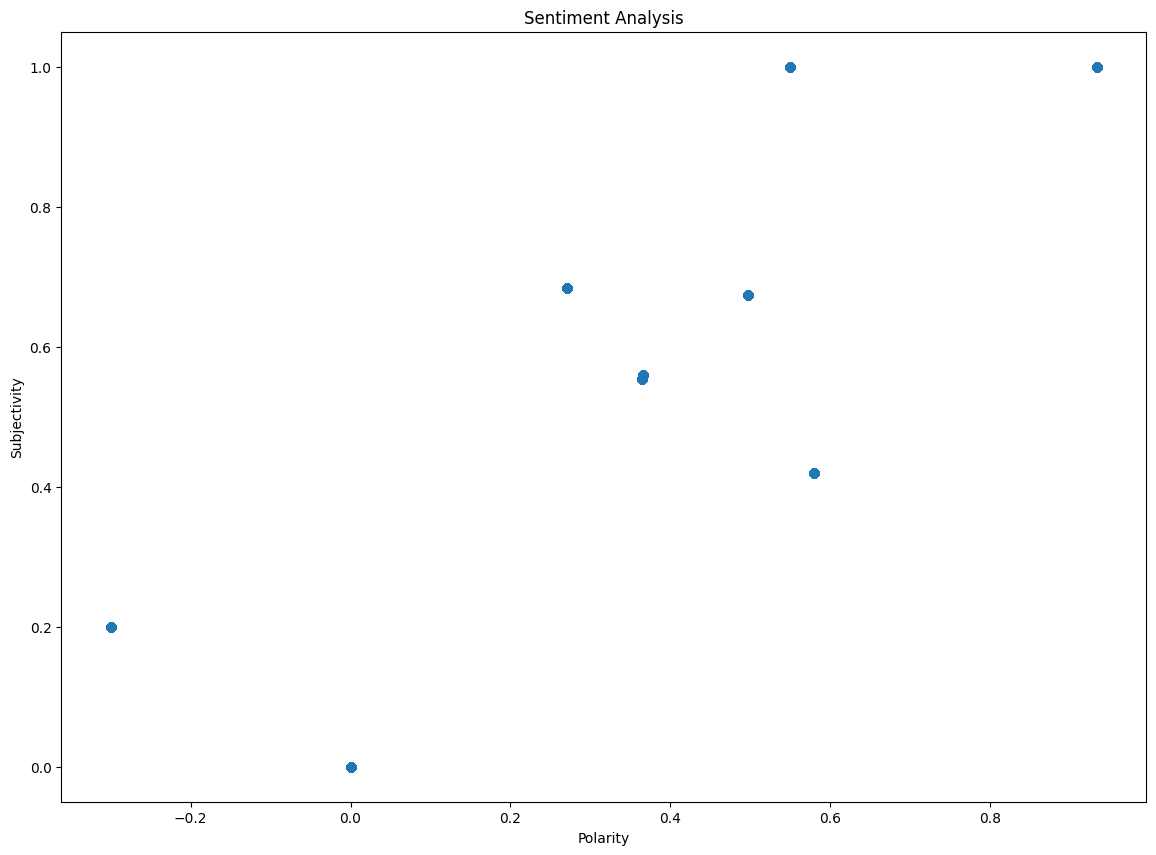

In [95]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [99]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,yes,Yes,[yes],0.00,0.000000,pos
1,must wow excellent product,"You must , wow,, excellent 10/10 product ,,,","[must, wow, excellent, product]",1.00,0.550000,pos
2,since using mac quite amazed machine work ease...,Its since using Mac & I'm quite amazed machine...,"[since, using, mac, quite, amazed, machine, wo...",0.20,-0.300000,neg
3,competitor macbook price high doubt never fill...,"There competitor macbook, Price high doubt nev...","[competitor, macbook, price, high, doubt, neve...",0.42,0.580000,pos
4,awesome laptop excellent screen excellent batt...,"Awesome laptop.Excellent screen, Excellent Bat...","[awesome, laptop, excellent, screen, excellent...",1.00,0.933333,pos


Story Generation and Visualization

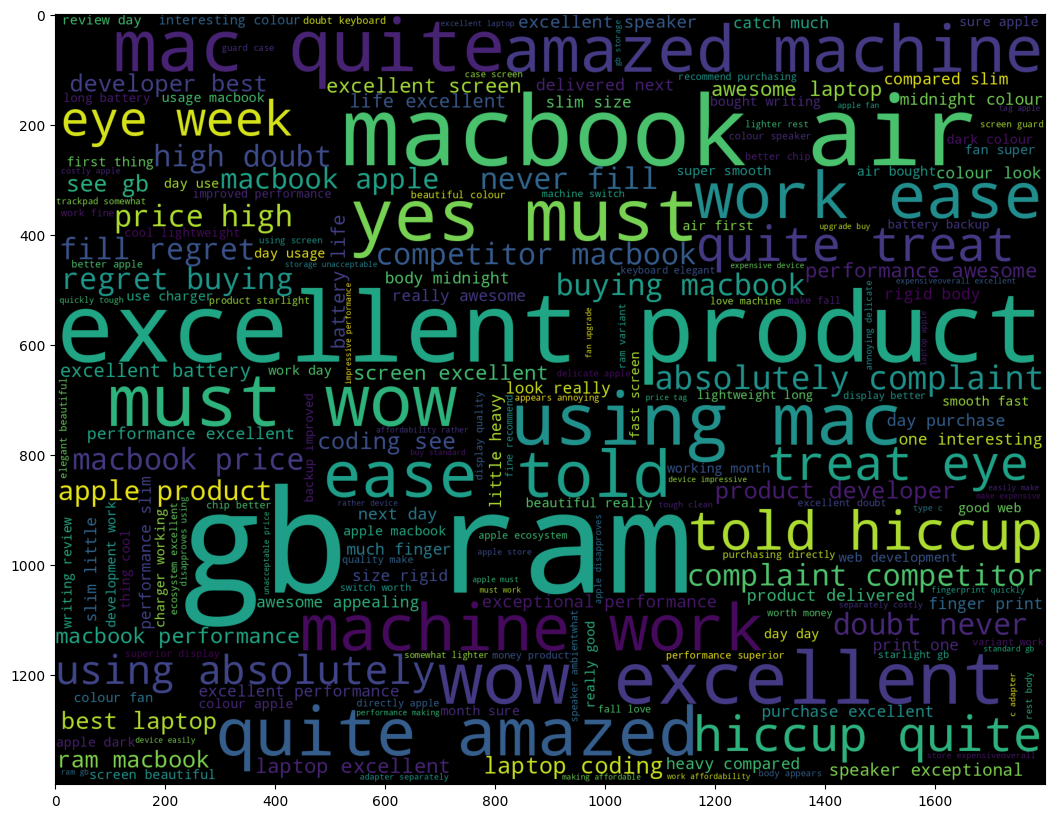

In [100]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

Most common words in positive Review

In [101]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

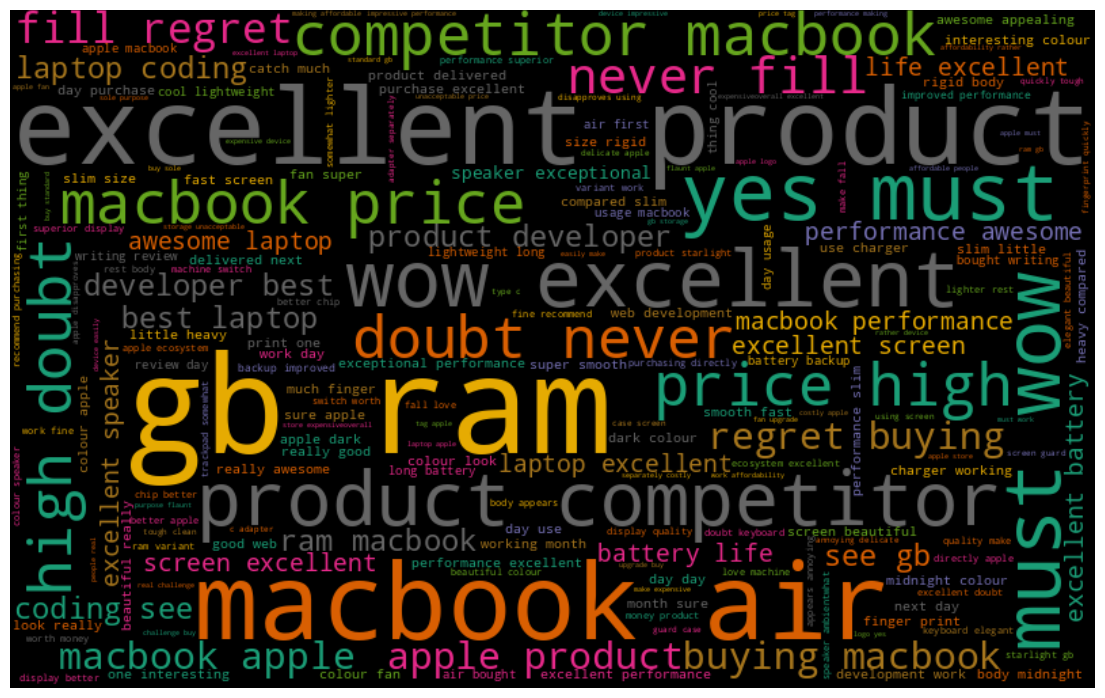

In [102]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Most common words in negative Review

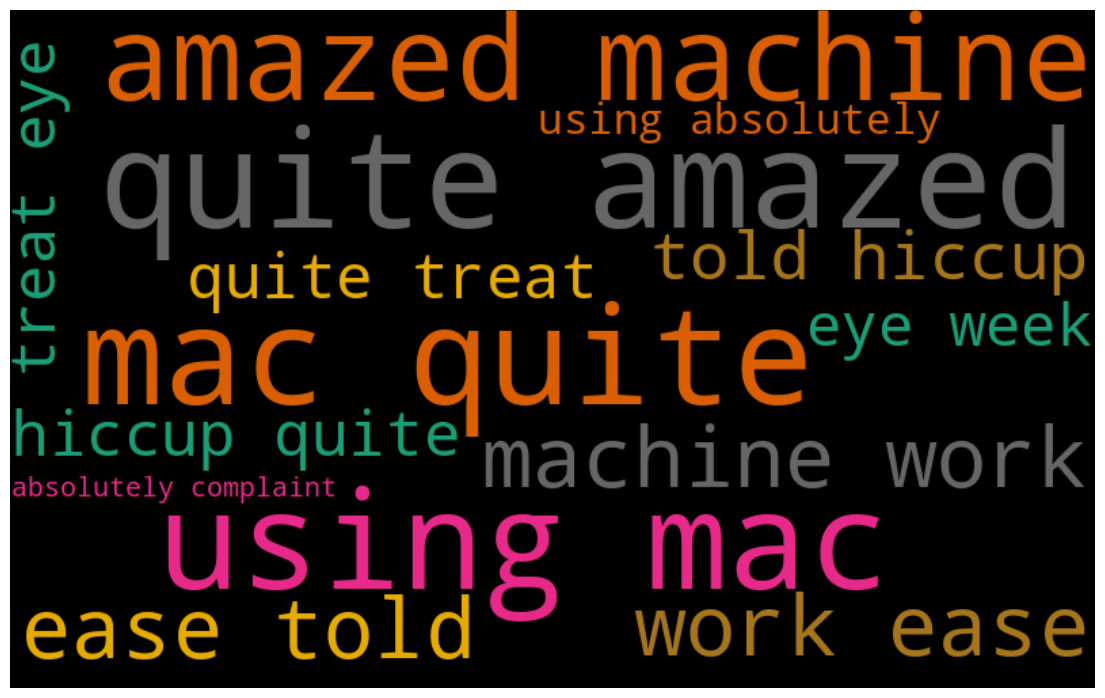

In [103]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)